In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
movies = pd.read_csv("P4-Movie-Ratings.csv")
movies.columns = ["Film", "Genre", "CriticRating", "AudienceRating", "Budget", "Year"]
sns.set(style="darkgrid")

# Dashboard

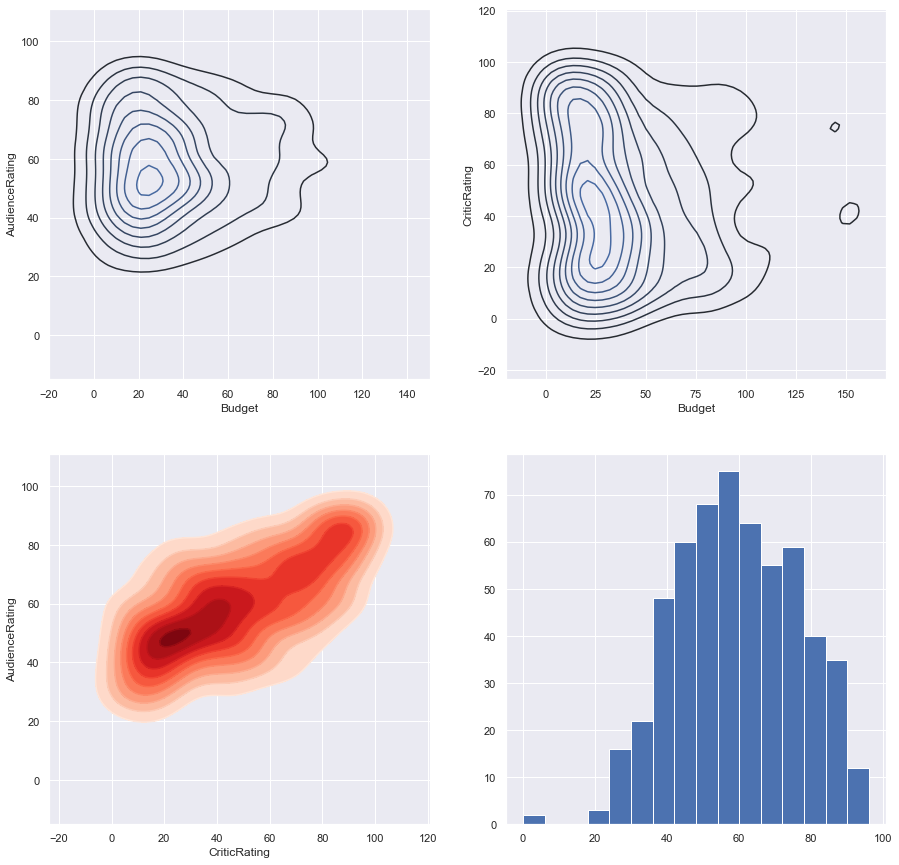

In [18]:
# Works for seaborn plots only
f, axes = plt.subplots(2,2, figsize = (15,15))
k1 = sns.kdeplot(movies.Budget, movies.AudienceRating, ax = axes[0][0])
k2 = sns.kdeplot(movies.Budget, movies.CriticRating, ax = axes[0][1])
k3 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest = False, cmap = "Reds", ax = axes[1][0])
k3b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = "Reds", ax = axes[1][0])

# If adding other plots, have to use "axes[x,y]." instead of ax parameter
#k4 = sns.violinplot(data = movies, x = "Genre", y = "CriticRating", ax = axes[1][1])
axes[1,1].hist(movies.AudienceRating, bins = 16)

k1.set(xlim = (-20, 150))
k2.set(xlim = (-20, 170))
plt.show()

# Styling

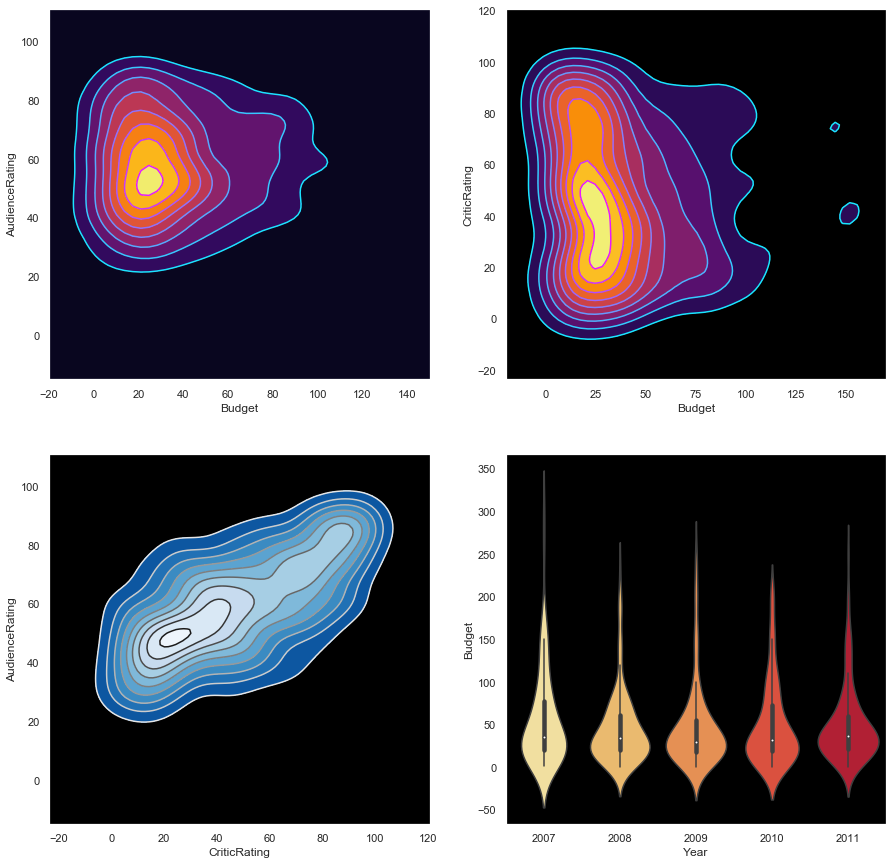

In [58]:
# Works for seaborn plots only
sns.set_style("dark", {"axes.facecolor":"black"})
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot 0,0
k1 = sns.kdeplot(movies.Budget, movies.AudienceRating, cmap = "inferno", shade = True, shade_lowest = True, ax = axes[0][0])
k1b = sns.kdeplot(movies.Budget, movies.AudienceRating, cmap = "cool", ax = axes[0][0])

# Plot 0,1
k2 = sns.kdeplot(movies.Budget, movies.CriticRating, ax = axes[0][1], cmap = "inferno", shade = True, shade_lowest = False)
k2b = sns.kdeplot(movies.Budget, movies.CriticRating, cmap = "cool", ax = axes[0][1])

# Plot 1,0
k3 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest = False, cmap = "Blues_r", ax = axes[1][0])
k3b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap = "gist_gray_r", ax = axes[1][0])

# Plot 1,1
# If adding other plots, have to use "axes[x,y]." instead of ax parameter
k4 = sns.violinplot(data = movies, x = "Year", y = "Budget", ax = axes[1][1], palette = "YlOrRd")
#axes[1,1].hist(movies.AudienceRating, bins = 16)

k1.set(xlim = (-20, 150))
k2.set(xlim = (-20, 170))
plt.show()

# Different colormaps in Seaborn
Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

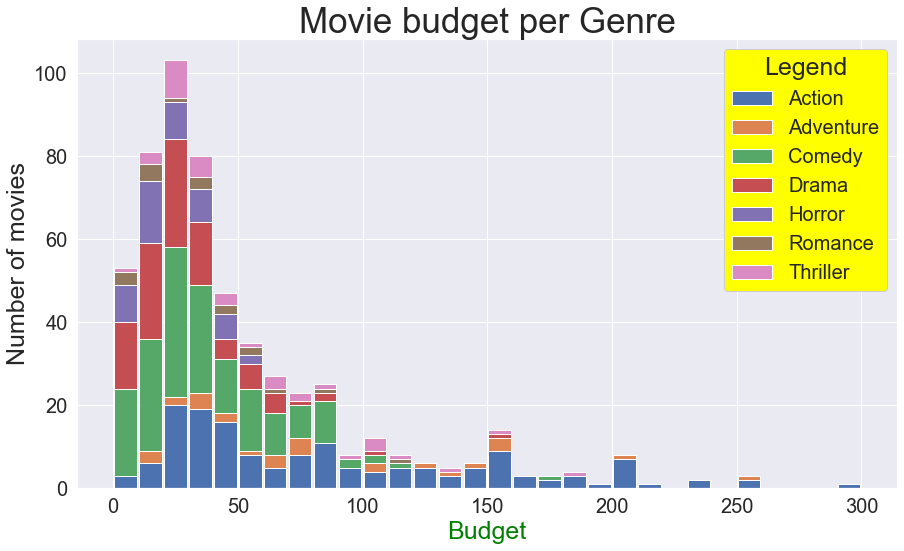

In [90]:
# Change certain columns type to category
movies.Film = movies.Film.astype("category")
movies.Genre = movies.Genre.astype("category")
movies.Year = movies.Year.astype("category")

sns.set_style("darkgrid")

movie_plot = list()
for genre in movies.Genre.cat.categories:
    movie_plot.append(movies[movies.Genre == genre].Budget)

# One way to increase possible customizations is to add a subplots layer, even though with only one figure
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)
h = plt.hist(movie_plot, bins = 30, stacked = True, rwidth = 0.9, label = movies.Genre.cat.categories)
plt.title("Movie budget per Genre", fontsize = 35)
plt.ylabel("Number of movies", fontsize = 25)
plt.xlabel("Budget", fontsize = 25, color = "Green")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(prop = {"size":20}, framealpha = 1, facecolor = "Yellow", title = "Legend", title_fontsize = 25)
plt.show()